In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
ls

 ドライブ C のボリューム ラベルは Local Disk です
 ボリューム シリアル番号は F66F-9DB0 です

 C:\Users\fkh\Documents\NotomiLab\NotomiLab_2019\20200331 Barik Qfactor\csv のディレクトリ

2020/03/31  00:23    <DIR>          .
2020/03/31  00:23    <DIR>          ..
2020/03/30  01:36    <DIR>          .ipynb_checkpoints
2020/03/30  15:26         1,346,690 20200331_band.ipynb
2020/03/30  05:06           337,337 3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band amo.csv
2020/03/30  12:42            67,904 3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band amo.csv.png
2020/03/30  05:06           336,460 3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band cry.csv
2020/03/30  12:42            68,316 3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band cry.csv.png
2020/03/30  21:28           337,523 3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band GeTe(lossless)-amo.csv
2020/03/30  21:29           337,596 3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30

In [28]:
csv_Tp = "論文再現 3D Barik a=800 Tp PMC.csv"
csv_Tr = "論文再現 3D Barik a=800 Tr PMC.csv"
GST_a="3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band amo.csv"
GST_c="3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band cry.csv"
GeTe_a="3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band GeTe-amo.csv"
GeTe_c="3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band GeTe-cry.csv"

GeTe_ll_a="3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band GeTe(lossless)-amo.csv"
GeTe_ll_c="3D Barik on SiO2 a=750 s=0.28a h=200 ΔR=1 thick=30nm mergin=0 band GeTe(lossless)-cry.csv"

n_GST = pd.read_csv("refractive_index_of_GST.csv")
n_GeTe = pd.read_csv("refractive_index_of_GeTe.csv")

In [5]:
def band_plot_THz(csv_name):
#    a = 745
    im_lim = 0.7
    c_const = 299792458

    band_normal = pd.read_csv(csv_name, skiprows = 5, header = None)

    band_normal[2] = band_normal[2]/10**12
    band_normal[3] = band_normal[3]/10**12
    
    new_cols = ["k","Re+Im","Re_ω/2π","Im_ω/2π"]
    band_normal.columns = new_cols

        # plot
    fs = 24
    x = band_normal["k"][band_normal["Im_ω/2π"] < im_lim]
    Re = band_normal["Re_ω/2π"][band_normal["Im_ω/2π"] < im_lim]
    Im = band_normal["Im_ω/2π"][band_normal["Im_ω/2π"] < im_lim]
    Q = Re/(2*Im)
    
    fig, ax = plt.subplots(figsize=(8,6),tight_layout=True)
    sc = ax.scatter(x,Re, c = np.log10(Q), cmap = cm.gist_ncar, 
                    vmin=0, 
                    vmax=4,
                    edgecolor='k')

    plt.colorbar(sc, label='log10(Q)')
    
    ax.set_xlim(0,3)
    ax.set_ylim(150,250)
    plt.xticks([0,0.5,1,1.5,2,2.5,3],['Γ','','K','','M','','Γ'])

    ax.set_xlabel("", fontsize = fs)
    ax.set_ylabel("Frequency[THz]", fontsize = fs)

    plt.tick_params(labelsize=fs)
    
    plt.savefig(csv_name + ".png")
    #ax.set_title(im0)
    ax.grid(True)
#    print(c)
    plt.show()

C:\Users\fkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


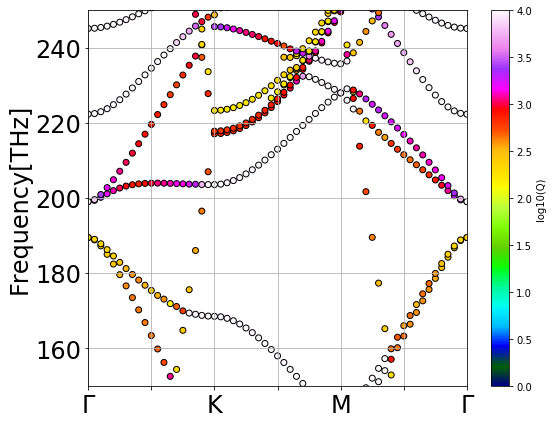

In [6]:
band_plot_THz(csv_Tr)

C:\Users\fkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


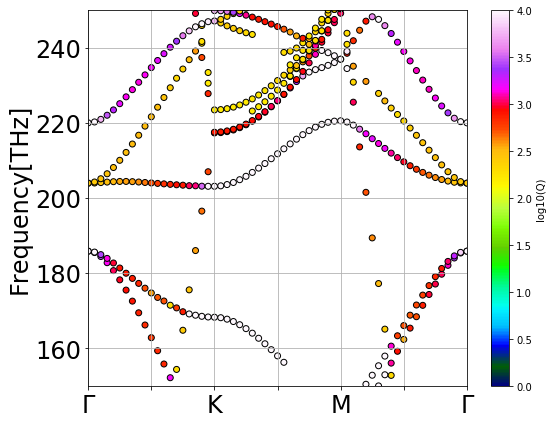

In [7]:
band_plot_THz(csv_Tp)

In [8]:
def band_plot_nm(csv_name):
#    a = 745
    im_lim = 3
    c_const = 299792458

    band_normal = pd.read_csv(csv_name, skiprows = 5, header = None)

    band_normal[2] = band_normal[2]/10**12
    band_normal[3] = band_normal[3]/10**12
    
    new_cols = ["k","Re+Im","Re_ω/2π","Im_ω/2π"]
    band_normal.columns = new_cols

        # plot
    fs = 24
    x = band_normal["k"][band_normal["Im_ω/2π"] < im_lim]
    Re = band_normal["Re_ω/2π"][band_normal["Im_ω/2π"] < im_lim]
    Im = band_normal["Im_ω/2π"][band_normal["Im_ω/2π"] < im_lim]
    wavelength = c_const/1000/Re
    Q = Re/(2*Im)
    
    x_mod = np.mod(x+1,3)
    
    fig, ax = plt.subplots(figsize=(8,6),tight_layout=True)
    sc = ax.scatter(x_mod,wavelength, c = np.log10(Q), cmap = cm.gist_ncar, 
                    vmin=0, 
                    vmax=4,
                    edgecolor='k')

    plt.colorbar(sc, label='log10(Q)')
    
    ax.set_xlim(0,2)
    ax.set_ylim(1300,1800)
    plt.xticks([0,0.5,1,1.5,2],["M","","Γ","","K"])

    ax.set_xlabel("", fontsize = fs)
    ax.set_ylabel("wavelength[nm]", fontsize = fs)

    plt.tick_params(labelsize=fs)
    
    plt.savefig(csv_name + ".png")
    #ax.set_title(im0)
    ax.grid(True)
#    print(c)
    plt.show()

C:\Users\fkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


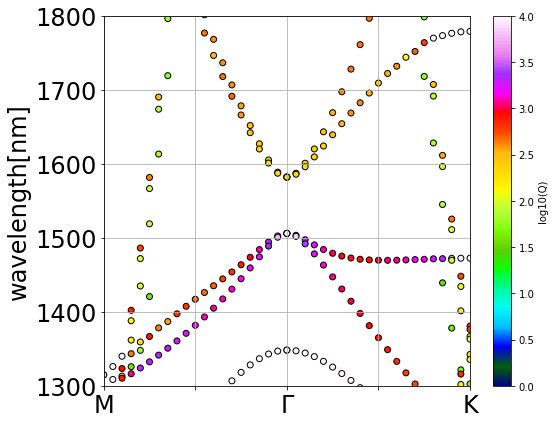

In [9]:
band_plot_nm(csv_Tr)

C:\Users\fkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


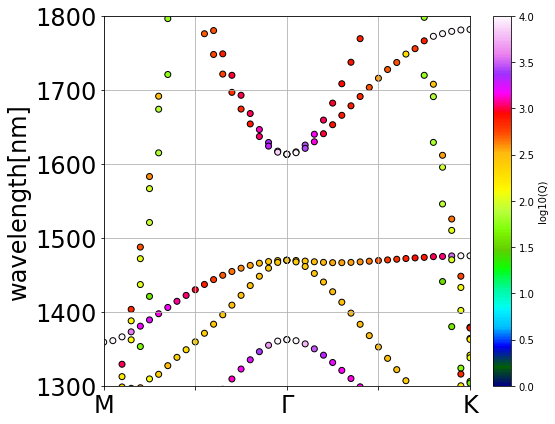

In [10]:
band_plot_nm(csv_Tp)

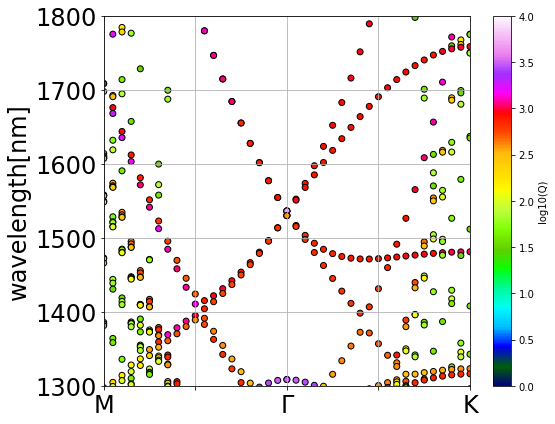

In [11]:
band_plot_nm(GST_a)

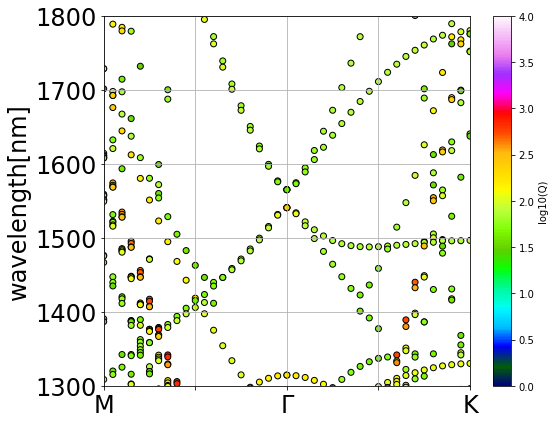

In [12]:
band_plot_nm(GST_c)

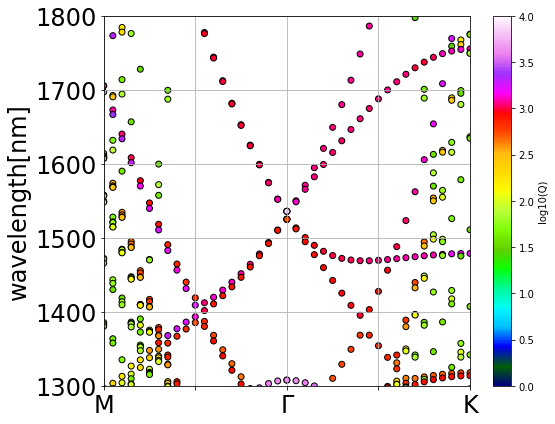

In [13]:
band_plot_nm(GeTe_a)

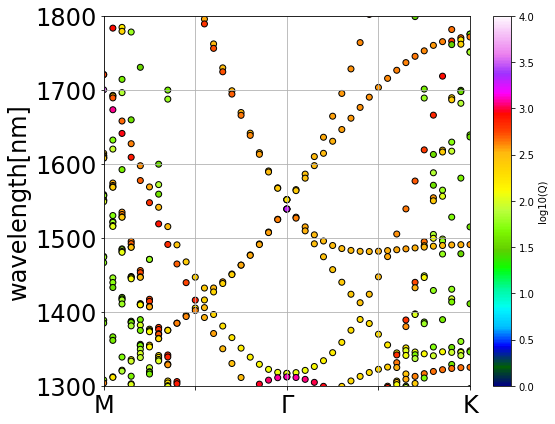

In [14]:
band_plot_nm(GeTe_c)

In [15]:
def band_plot_THz_MgammaK(csv_name):
#    a = 745
    im_lim = 3
    c_const = 299792458

    band_normal = pd.read_csv(csv_name, skiprows = 5, header = None)

    band_normal[2] = band_normal[2]/10**12
    band_normal[3] = band_normal[3]/10**12
    
    new_cols = ["k","Re+Im","Re_ω/2π","Im_ω/2π"]
    band_normal.columns = new_cols

        # plot
    fs = 24
    x = band_normal["k"][band_normal["Im_ω/2π"] < im_lim]
    Re = band_normal["Re_ω/2π"][band_normal["Im_ω/2π"] < im_lim]
    Im = band_normal["Im_ω/2π"][band_normal["Im_ω/2π"] < im_lim]
    wavelength = c_const/1000/Re
    Q = Re/(2*Im)
    
    x_mod = np.mod(x+1,3)
    
    fig, ax = plt.subplots(figsize=(8,6),tight_layout=True)
    sc = ax.scatter(x_mod, Re, c = np.log10(Q), cmap = cm.gist_ncar, 
                    vmin=0, 
                    vmax=4,
                    edgecolor='k')

    plt.colorbar(sc, label='log10(Q)')
    
    ax.set_xlim(0,2)
    ax.set_ylim(160,220)
    plt.xticks([0,0.5,1,1.5,2],["M","","Γ","","K"])

    ax.set_xlabel("", fontsize = fs)
    ax.set_ylabel("Frequency[THz]", fontsize = fs)

    plt.tick_params(labelsize=fs)
    
    plt.savefig(csv_name + ".png")
    #ax.set_title(im0)
    ax.grid(True)
#    print(c)
    plt.show()

C:\Users\fkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


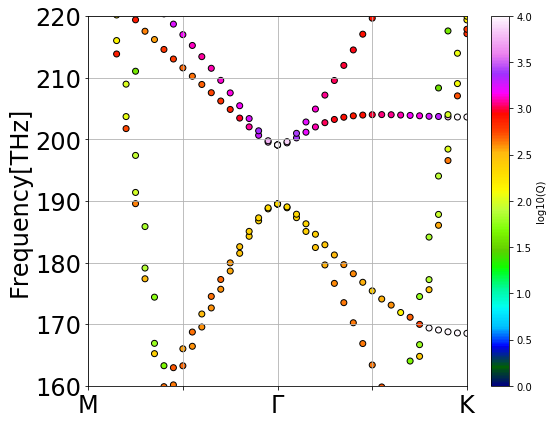

In [16]:
band_plot_THz_MgammaK(csv_Tr)

C:\Users\fkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


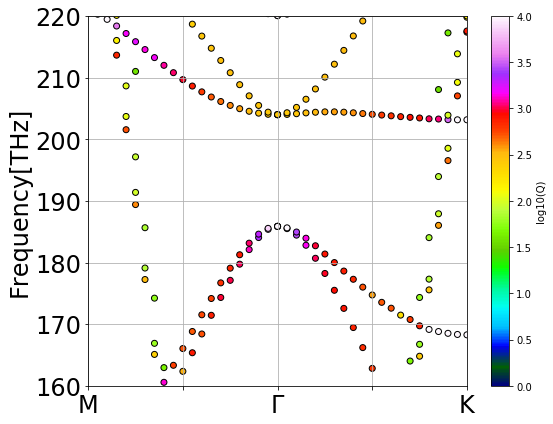

In [17]:
band_plot_THz_MgammaK(csv_Tp)

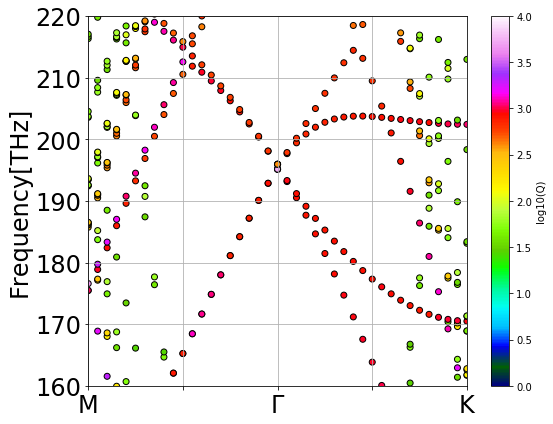

In [18]:
band_plot_THz_MgammaK(GST_a)

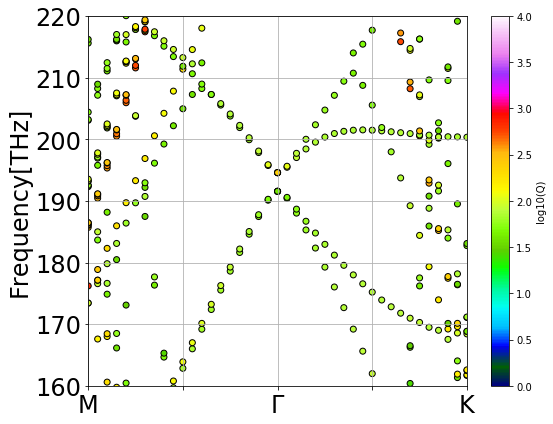

In [19]:
band_plot_THz_MgammaK(GST_c)

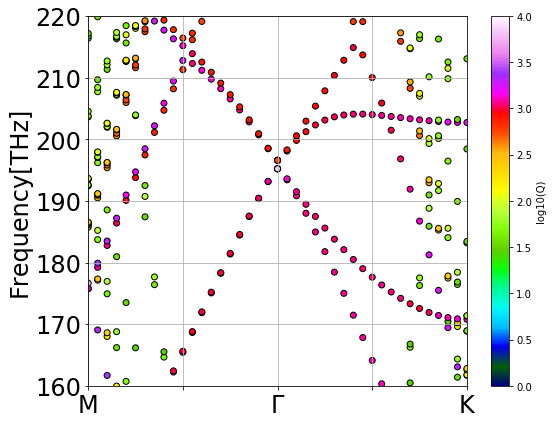

In [20]:
band_plot_THz_MgammaK(GeTe_a)

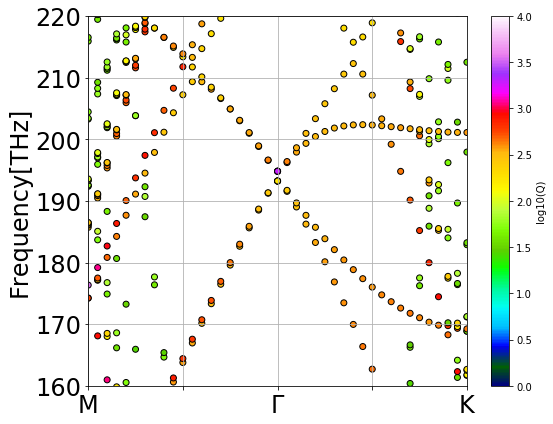

In [21]:
band_plot_THz_MgammaK(GeTe_c)

C:\Users\fkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


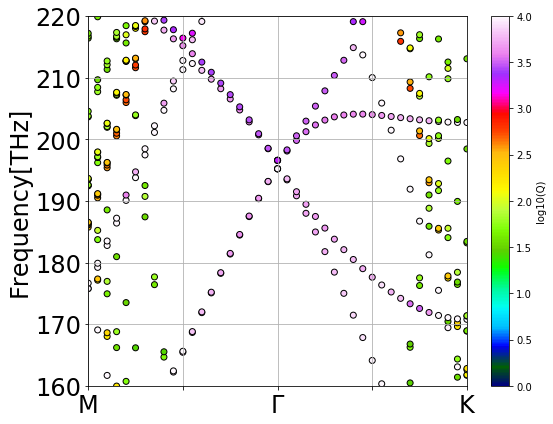

In [25]:
band_plot_THz_MgammaK(GeTe_ll_a)

C:\Users\fkh\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


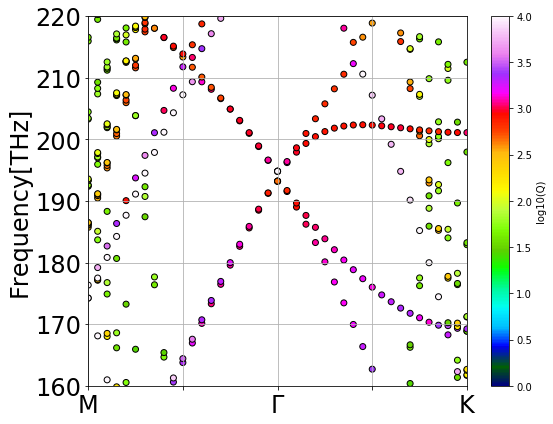

In [27]:
band_plot_THz_MgammaK(GeTe_ll_c)

In [22]:
def ellipso_plot(data):
    new_cols = ["wavelength", 'n_depo', 'k_depo', 'n_anneal', 'k_anneal']
    data.columns = new_cols
    
    figsize_px = np.array([1500, 700]) #画像サイズ指定
    dpi = 100 #解像度
    figsize_inch = figsize_px / dpi
    print('figsize', figsize_inch)
    
    font_size = 30
    fig = plt.figure(figsize= figsize_inch)
    
    #nをプロット
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(data["wavelength"],data["n_depo"],label="deposited", color="turquoise",linewidth=4)
    ax1.plot(data["wavelength"],data["n_anneal"],label="annealed", color="r", linewidth=4)
    #ax1.plot(data["wavelength"],data["paper_n-amo"],label="literature data (amo)", color="darkcyan",linestyle = "--", linewidth=4)
    #ax1.plot(data["wavelength"],data["paper_n-cry"],label="literature data (cry)", color="darkred",linestyle = "--", linewidth=4)
    
    plt.xlabel("wavelength",fontsize=font_size)
    plt.ylabel("refractive index",fontsize=font_size)
    plt.xlim([1300,1700])
    plt.ylim([0,8])
    plt.grid(True)
    plt.legend(fontsize=font_size*0.7)
    plt.tick_params(labelsize=font_size)
    
    #kをプロット
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(data["wavelength"],data["k_depo"],label="amorphous",linewidth=4, color="turquoise")
    ax2.plot(data["wavelength"],data["k_anneal"],label="crystal",linewidth=4, color="r")
    #ax2.plot(data["wavelength"],data["paper_k-amo"],label="literature data (amo)",linestyle = "--", linewidth=4, color="darkcyan")
    #ax2.plot(data["wavelength"],data["paper_k-cry"],label="literature data (cry)",linestyle = "--", linewidth=4, color="darkred")
    #    plt.plot(data["wavelength"],data["n_depo"],label="n_depo", color="y")
    plt.xlabel("wavelength",fontsize=font_size)
    plt.ylabel("extinction coefficient",fontsize=font_size)
    #    plt.title("GST on Si (900~1700nm)")
    plt.xlim([1300,1700])
    plt.ylim([0,3])
    plt.grid(True)
    #    plt.legend(fontsize=font_size)
    plt.tick_params(labelsize=font_size) #グラフの数字のフォント
    plt.tight_layout() #はみ出し防止

    plt.savefig('figure.png')
    

figsize [15.  7.]


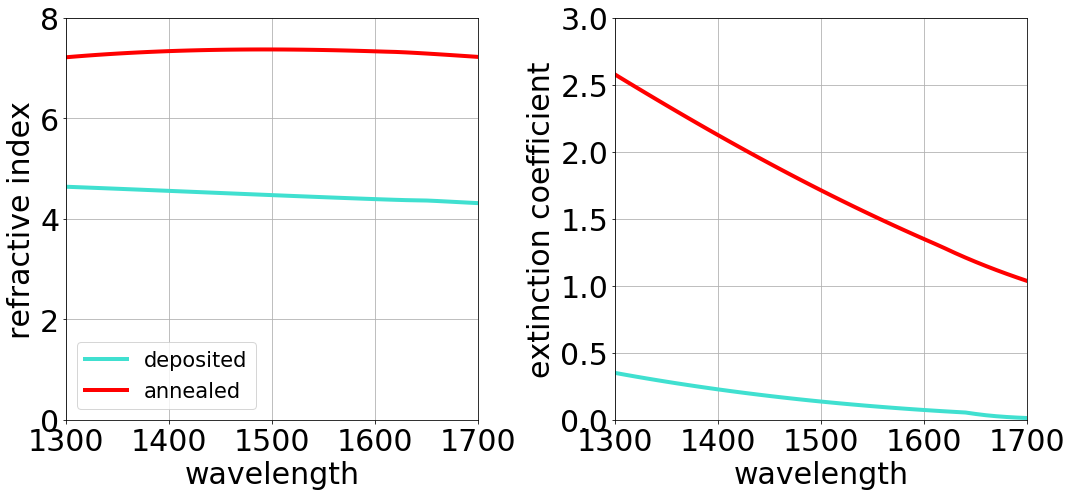

In [29]:
ellipso_plot(n_GST)

figsize [15.  7.]


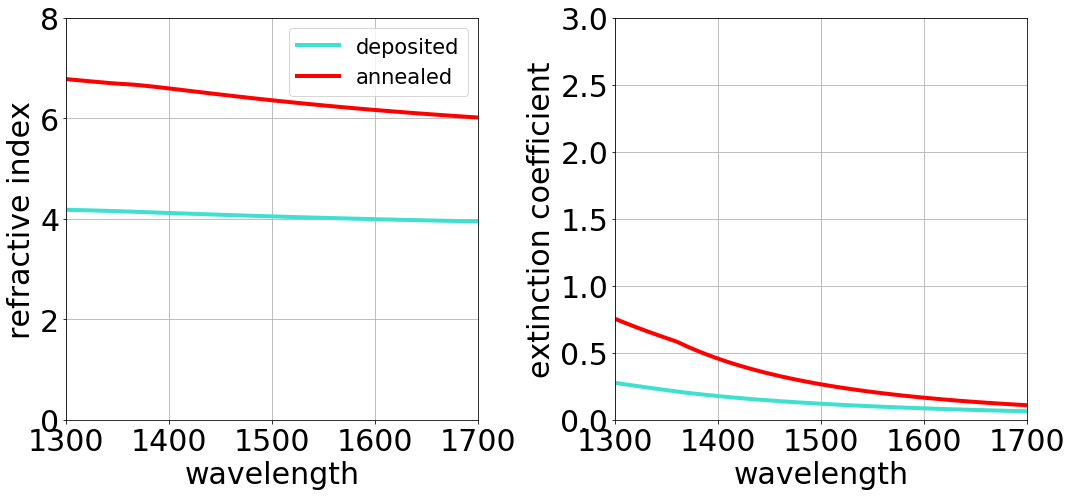

In [24]:
ellipso_plot(n_GeTe)